# CHRONIC KIDNEY DISEASE PREDICTION USING MACHINE LEARNING 

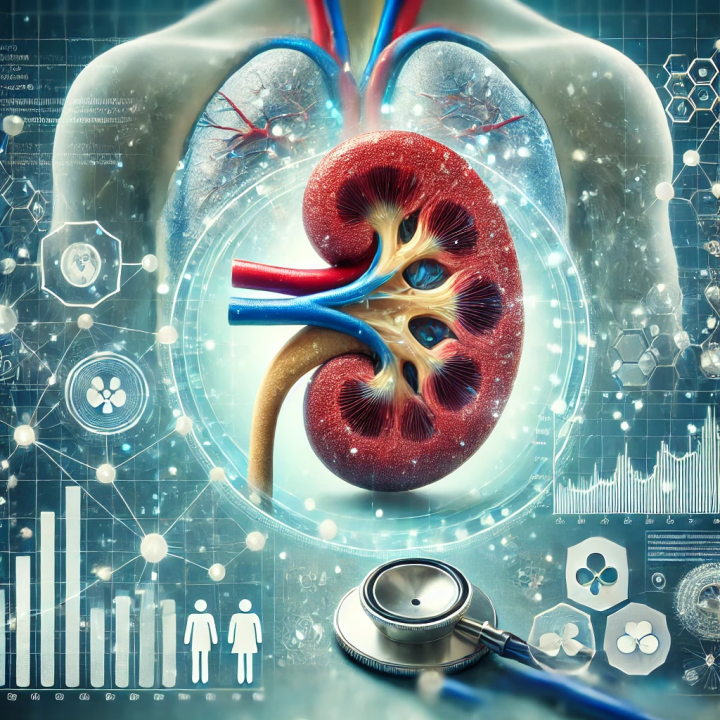

## Project Objective

#### Chronic Kidney Disease (CKD) is a serious health condition that often progresses silently until advanced stages, making early detection vital for effective treatment and improved patient outcomes. Machine Learning techniques can provide reliable prediction systems that support doctors in timely diagnosis and clinical decision-making. In this project, I analyzed a chronic kidney disease dataset with thorough preprocessing, handling missing values and categorical variables. Multiple classification algorithms were implemented in Python using Scikit-learn (and XGBoost where available) to predict the presence of CKD. The models were evaluated using accuracy, precision, recall, F1-score, and ROC-AUC, enabling the selection of the most effective algorithm for early CKD detection.

### Step 1: Import Required Modules

In [1]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

try:
    from xgboost import XGBClassifier
    _HAS_XGB = True
except Exception:
    _HAS_XGB = False

import joblib

print('All modules imported. XGBoost available:', _HAS_XGB)



All modules imported. XGBoost available: True


In [2]:
#pip install joblib

### Step 2: Loading Data

In [3]:
csv_path = "https://raw.githubusercontent.com/Saurabh641444/Chronic-Kidney-Disease-Prediction/main/Kidney_data.csv"
df = pd.read_csv(csv_path)
print("Raw shape:", df.shape)
df.head()

Raw shape: (400, 26)


id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

### Step 3: Understanding Data using EDA

In [4]:
# 3.1 :Data head
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
# 3.2 :Data tail
df.tail()

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [6]:
# 3.3 :Data Shape
df.shape

(400, 26)

In [7]:
# 3.4 :Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

##### 3.5: Column Desc  

- **age:** `age`  
- **bp:** `blood pressure`  
- **sg:** `specific gravity`  
- **al:** `albumin`  
- **su:** `sugar`  
- **rbc:** `red blood cells`  
- **pc:** `pus cell`  
- **pcc:** `pus cell clumps`  
- **ba:** `bacteria`  
- **bgr:** `blood glucose random`  
- **bu:** `blood urea`  
- **sc:** `serum creatinine`  
- **sod:** `sodium`  
- **pot:** `potassium`  
- **hemo:** `hemoglobin`  
- **pcv:** `packed cell volume`  
- **wc:** `white blood cell count`  
- **rc:** `red blood cell count`  
- **htn:** `hypertension`  
- **dm:** `diabetes mellitus`  
- **cad:** `coronary artery disease`  
- **appet:** `appetite`  
- **pe:** `pedal edema`  
- **ane:** `anemia`  


In [8]:
# 3.6 :Checking null counts
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
# 3.8 :Description
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

In [10]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

##### Replacing Categorical values to numeric values:

In [11]:
df['rbc'] = df['rbc'].replace(to_replace={'normal': 0, 'abnormal': 1})
df['pc'] = df['pc'].replace(to_replace={'normal': 0, 'abnormal': 1})
df['pcc'] = df['pcc'].replace(to_replace={'notpresent': 0, 'present': 1})
df['ba'] = df['ba'].replace(to_replace={'notpresent': 0, 'present': 1})
df['htn'] = df['htn'].replace(to_replace={'yes': 1, 'no': 0})
df['dm'] = df['dm'].replace(to_replace={'\tyes': 'yes', ' yes': 'yes', '\tno': 'no'})
df['dm'] = df['dm'].replace(to_replace={'yes': 1, 'no': 0})
df['cad'] = df['cad'].replace(to_replace={'\tno': 'no'})
df['cad'] = df['cad'].replace(to_replace={'yes': 1, 'no': 0})
df['appet'] = df['appet'].replace(to_replace={'good': 1, 'poor': 0, 'no': np.nan})
df['pe'] = df['pe'].replace(to_replace={'yes': 1, 'no': 0})
df['ane'] = df['ane'].replace(to_replace={'yes': 1, 'no': 0})
df['classification'] = df['classification'].replace(to_replace={'ckd\t': 'ckd'})
df['classification'] = [1 if i == 'ckd' else 0 for i in df['classification']]


In [12]:
df.head()

id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...  pcv    wc   rc  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  0.0  0.0  ...   44  7800  5.2   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  0.0  0.0  ...   38  6000  NaN   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  ...   31  7500  NaN   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  ...   32  6700  3.9   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  ...   35  7300  4.6   

   htn   dm  cad appet   pe  ane  classification  
0  1.0  1.0  0.0   1.0  0.0  0.0               1  
1  0.0  0.0  0.0   1.0  0.0  0.0               1  
2  0.0  1.0  0.0   0.0  0.0  1.0               1  
3  1.0  0.0  0.0   0.0  1.0  1.0               1  
4  0.0  0.0  0.0   1.0  0.0  0.0               1  

[5 rows x 26 columns]

##### Converting Object values into Numeric values:

In [13]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')     

In [14]:
df.dtypes    

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [15]:
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              rbc          pc         pcc          ba  ...         pcv  \
count  248.000000  335.000000  396.000000  396.000000  ...  329.000000   
mean     0.189516    0.226866    0.106061    0.055556  ...   38.884498   
std      0.392711    0.419431    0.308305    0.229351  ...    8.990105   
min      0.000000    0.000000    0.000000    0.000000  ...    9.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...   32.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...   40.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...   45.000000   
max      1.000000    1.000000    1.000000    1.000000  ...   54.000000   

                 wc          rc         htn          dm         cad  \
count    294.000000  269.000000  398.000000  398.000000  398.000000   
mean    8406.122449    4.707435    0.369347    0.344221    0.085427   
std     2944.474190    1.025323    0.483235    0.475712    0.279868   
min     2200.000000    2.100000    0.000000    0.000000    0.000000   
25%     6500.000000    3.900000    0.000000    0.000000    0.000000   
50%     8000.000000    4.800000    0.000000    0.000000    0.000000   
75%     9800.000000    5.400000    1.000000    1.000000    0.000000   
max    26400.000000    8.000000    1.000000    1.000000    1.000000   

            appet          pe         ane  classification  
count  399.000000  399.000000  399.000000      400.000000  
mean     0.794486    0.190476    0.150376        0.625000  
std      0.404584    0.393170    0.357888        0.484729  
min      0.000000    0.000000    0.000000        0.000000  
25%      1.000000    0.000000    0.000000        0.000000  
50%      1.000000    0.000000    0.000000        1.000000  
75%      1.000000    0.000000    0.000000        1.000000  
max      1.000000    1.000000    1.000000        1.000000  

[8 rows x 26 columns]

In [16]:
# 3.9: Checking Missing (NaN) Values:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
pcc                 4
ba                  4
dm                  2
htn                 2
cad                 2
appet               1
ane                 1
pe                  1
id                  0
classification      0
dtype: int64

##### Handling Null Values: 

In [17]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [18]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [19]:
for feature in features:
    df[feature] = df[feature].fillna(df[feature].median())

In [20]:
df.isnull().any().sum()

np.int64(0)

### HEATMAP:

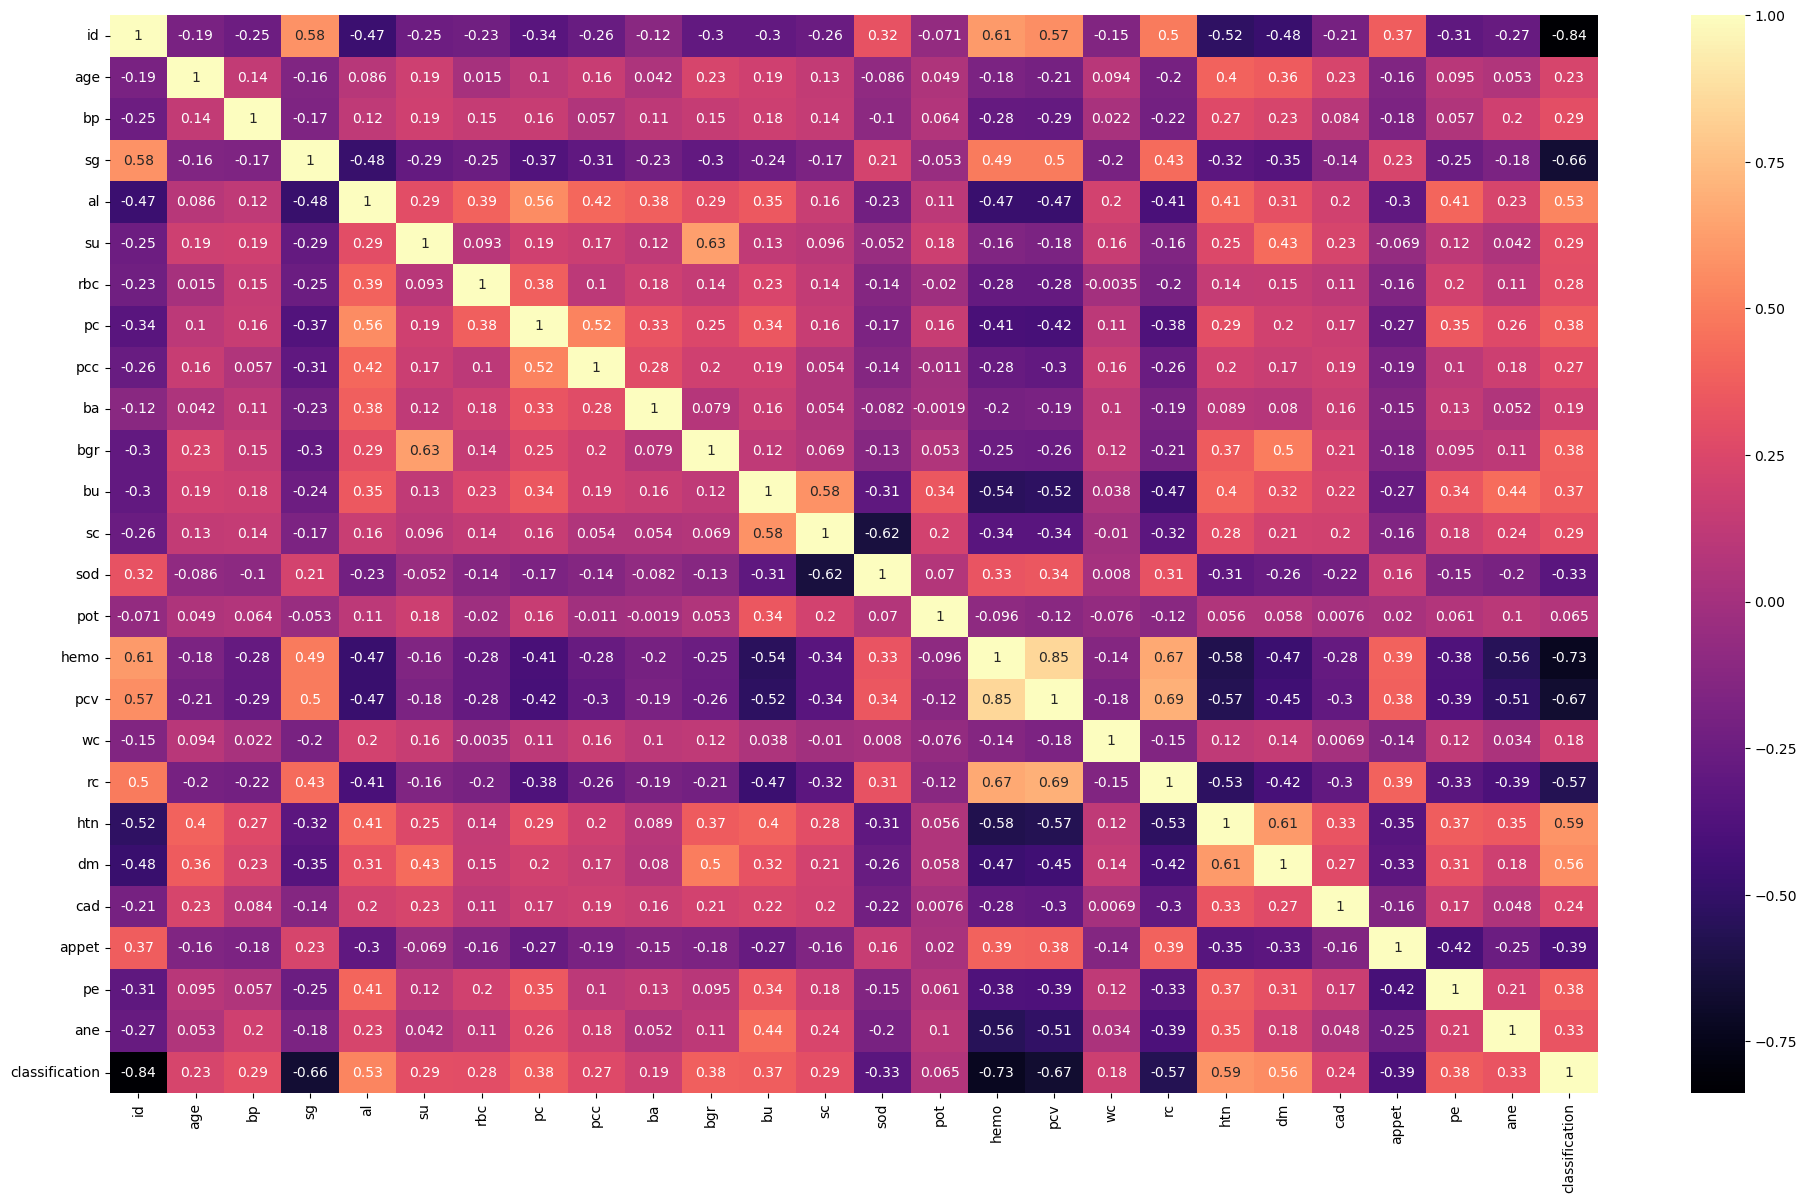

In [21]:
plt.figure(figsize=(24,14))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.show()

- We clearly see that 'pcv' and 'hemo' feature has 85% multicollinearity
- So we remove one of the feature. i.e pcv

In [22]:
df.drop('pcv', axis=1, inplace=True)

In [23]:
df.head()

id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...  hemo      wc  \
0   0  48.0  80.0  1.020  1.0  0.0  0.0  0.0  0.0  0.0  ...  15.4  7800.0   
1   1   7.0  50.0  1.020  4.0  0.0  0.0  0.0  0.0  0.0  ...  11.3  6000.0   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  ...   9.6  7500.0   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  ...  11.2  6700.0   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  ...  11.6  7300.0   

    rc  htn   dm  cad  appet   pe  ane  classification  
0  5.2  1.0  1.0  0.0    1.0  0.0  0.0               1  
1  4.8  0.0  0.0  0.0    1.0  0.0  0.0               1  
2  4.8  0.0  1.0  0.0    0.0  0.0  1.0               1  
3  3.9  1.0  0.0  0.0    0.0  1.0  1.0               1  
4  4.6  0.0  0.0  0.0    1.0  0.0  0.0               1  

[5 rows x 25 columns]

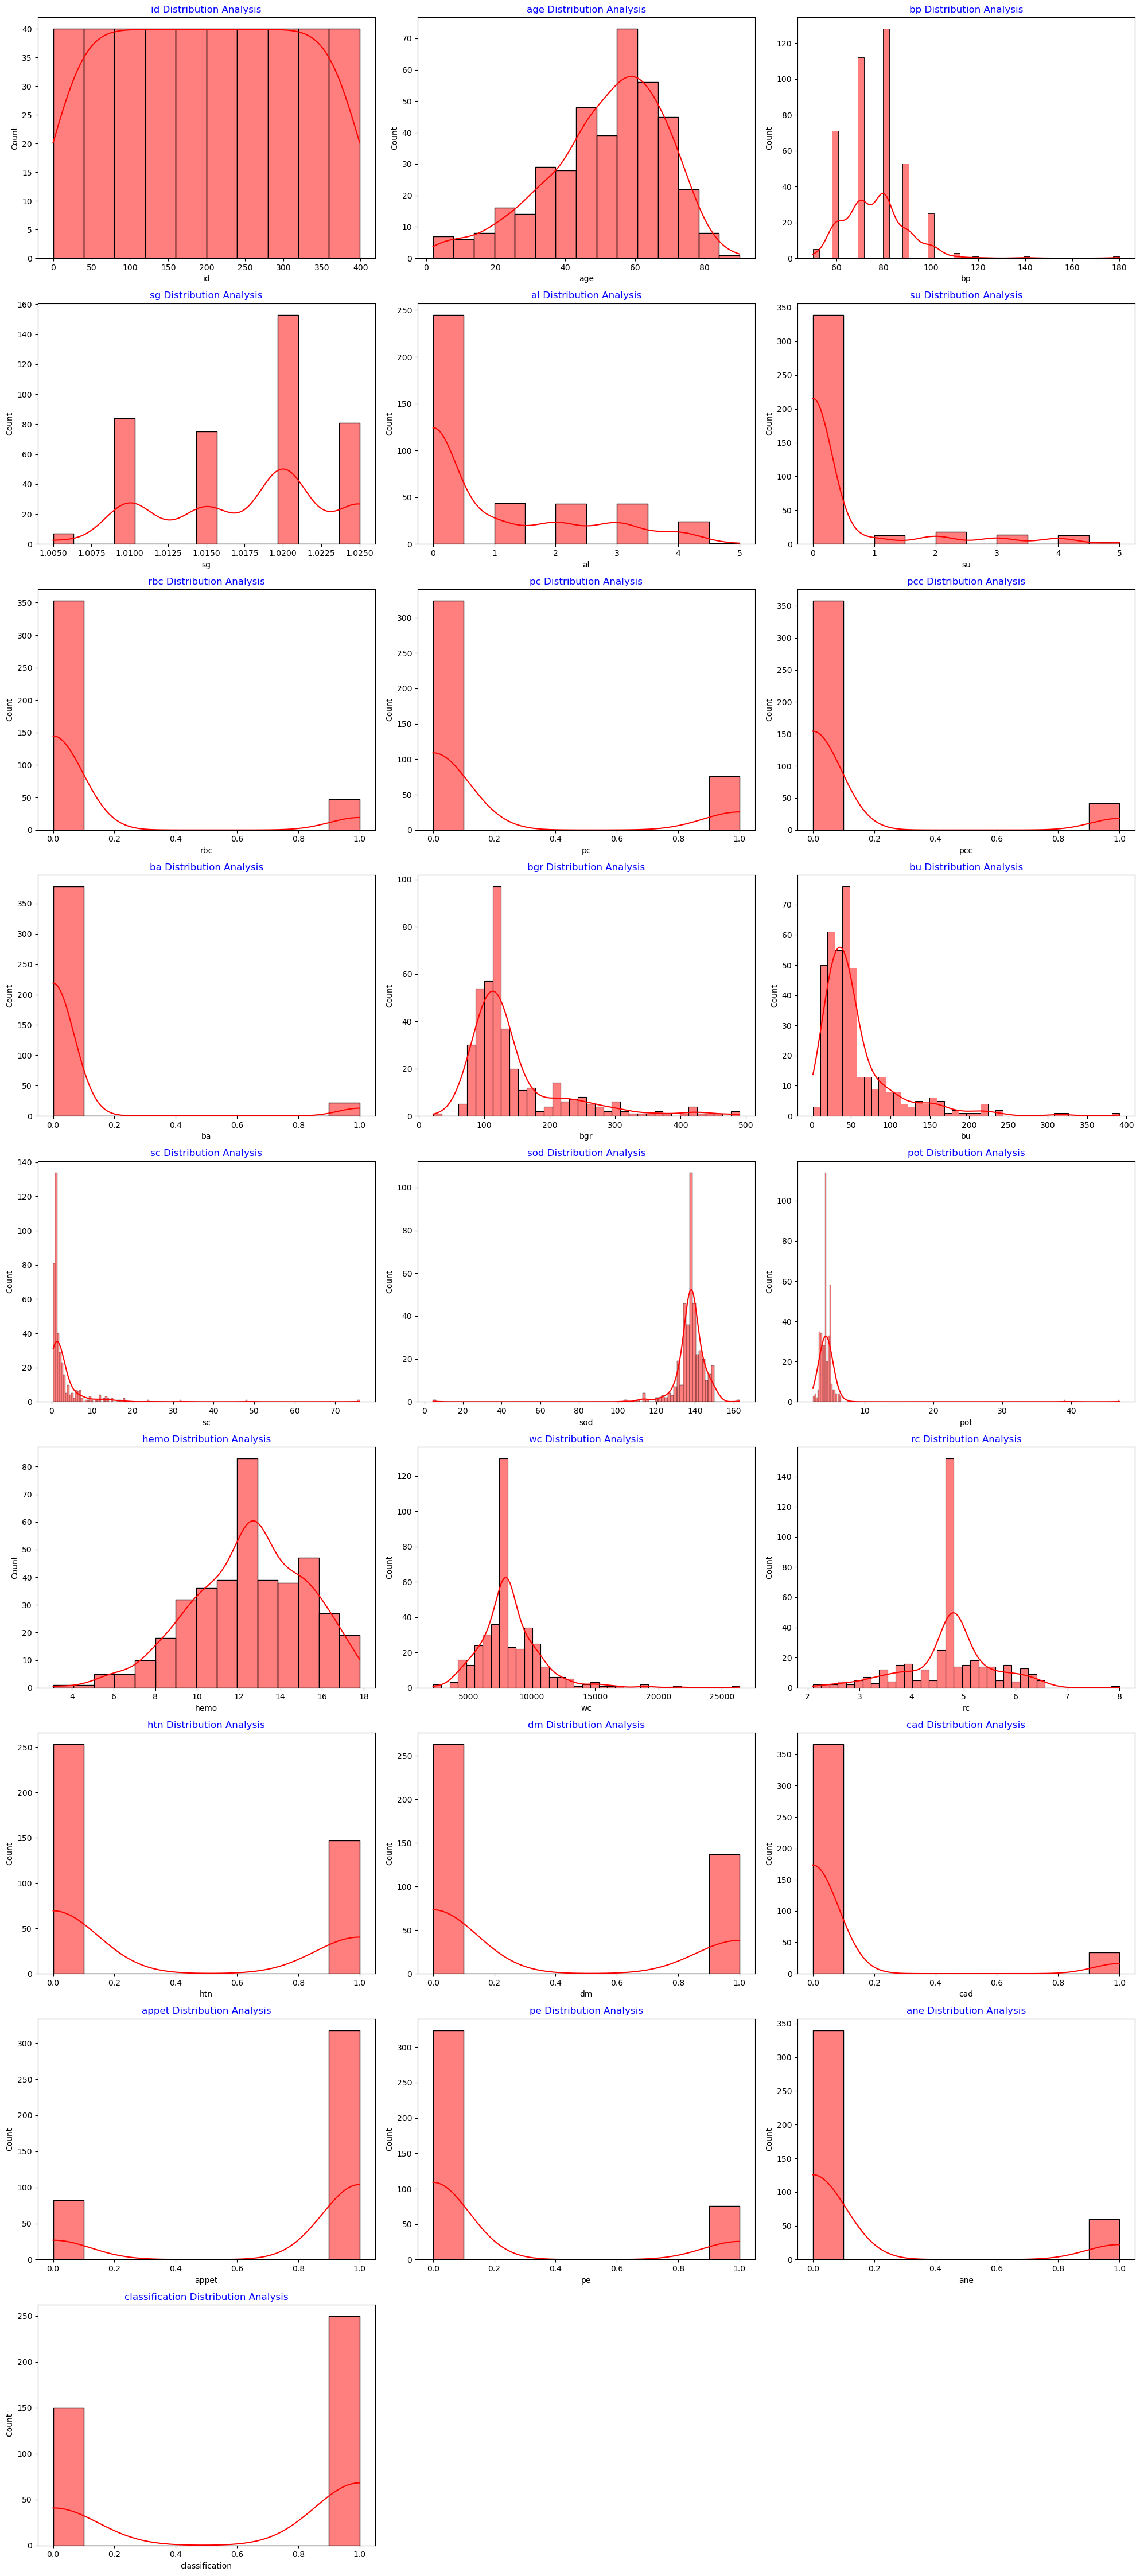

In [24]:
import math
n = len(df.columns)   # number of features
c = 3                 # columns
r = math.ceil(n / c)  # rows needed
plt.figure(figsize=(20, 5*r))
for i, j in enumerate(df.columns):
    plt.subplot(r, c, i+1)
    plt.title(f'{j} Distribution Analysis', color='Blue')
    sns.histplot(df[j], kde=True, color='r')
plt.tight_layout()
plt.savefig('All Numerical Features Analysis.jpeg', dpi=500)
plt.show()

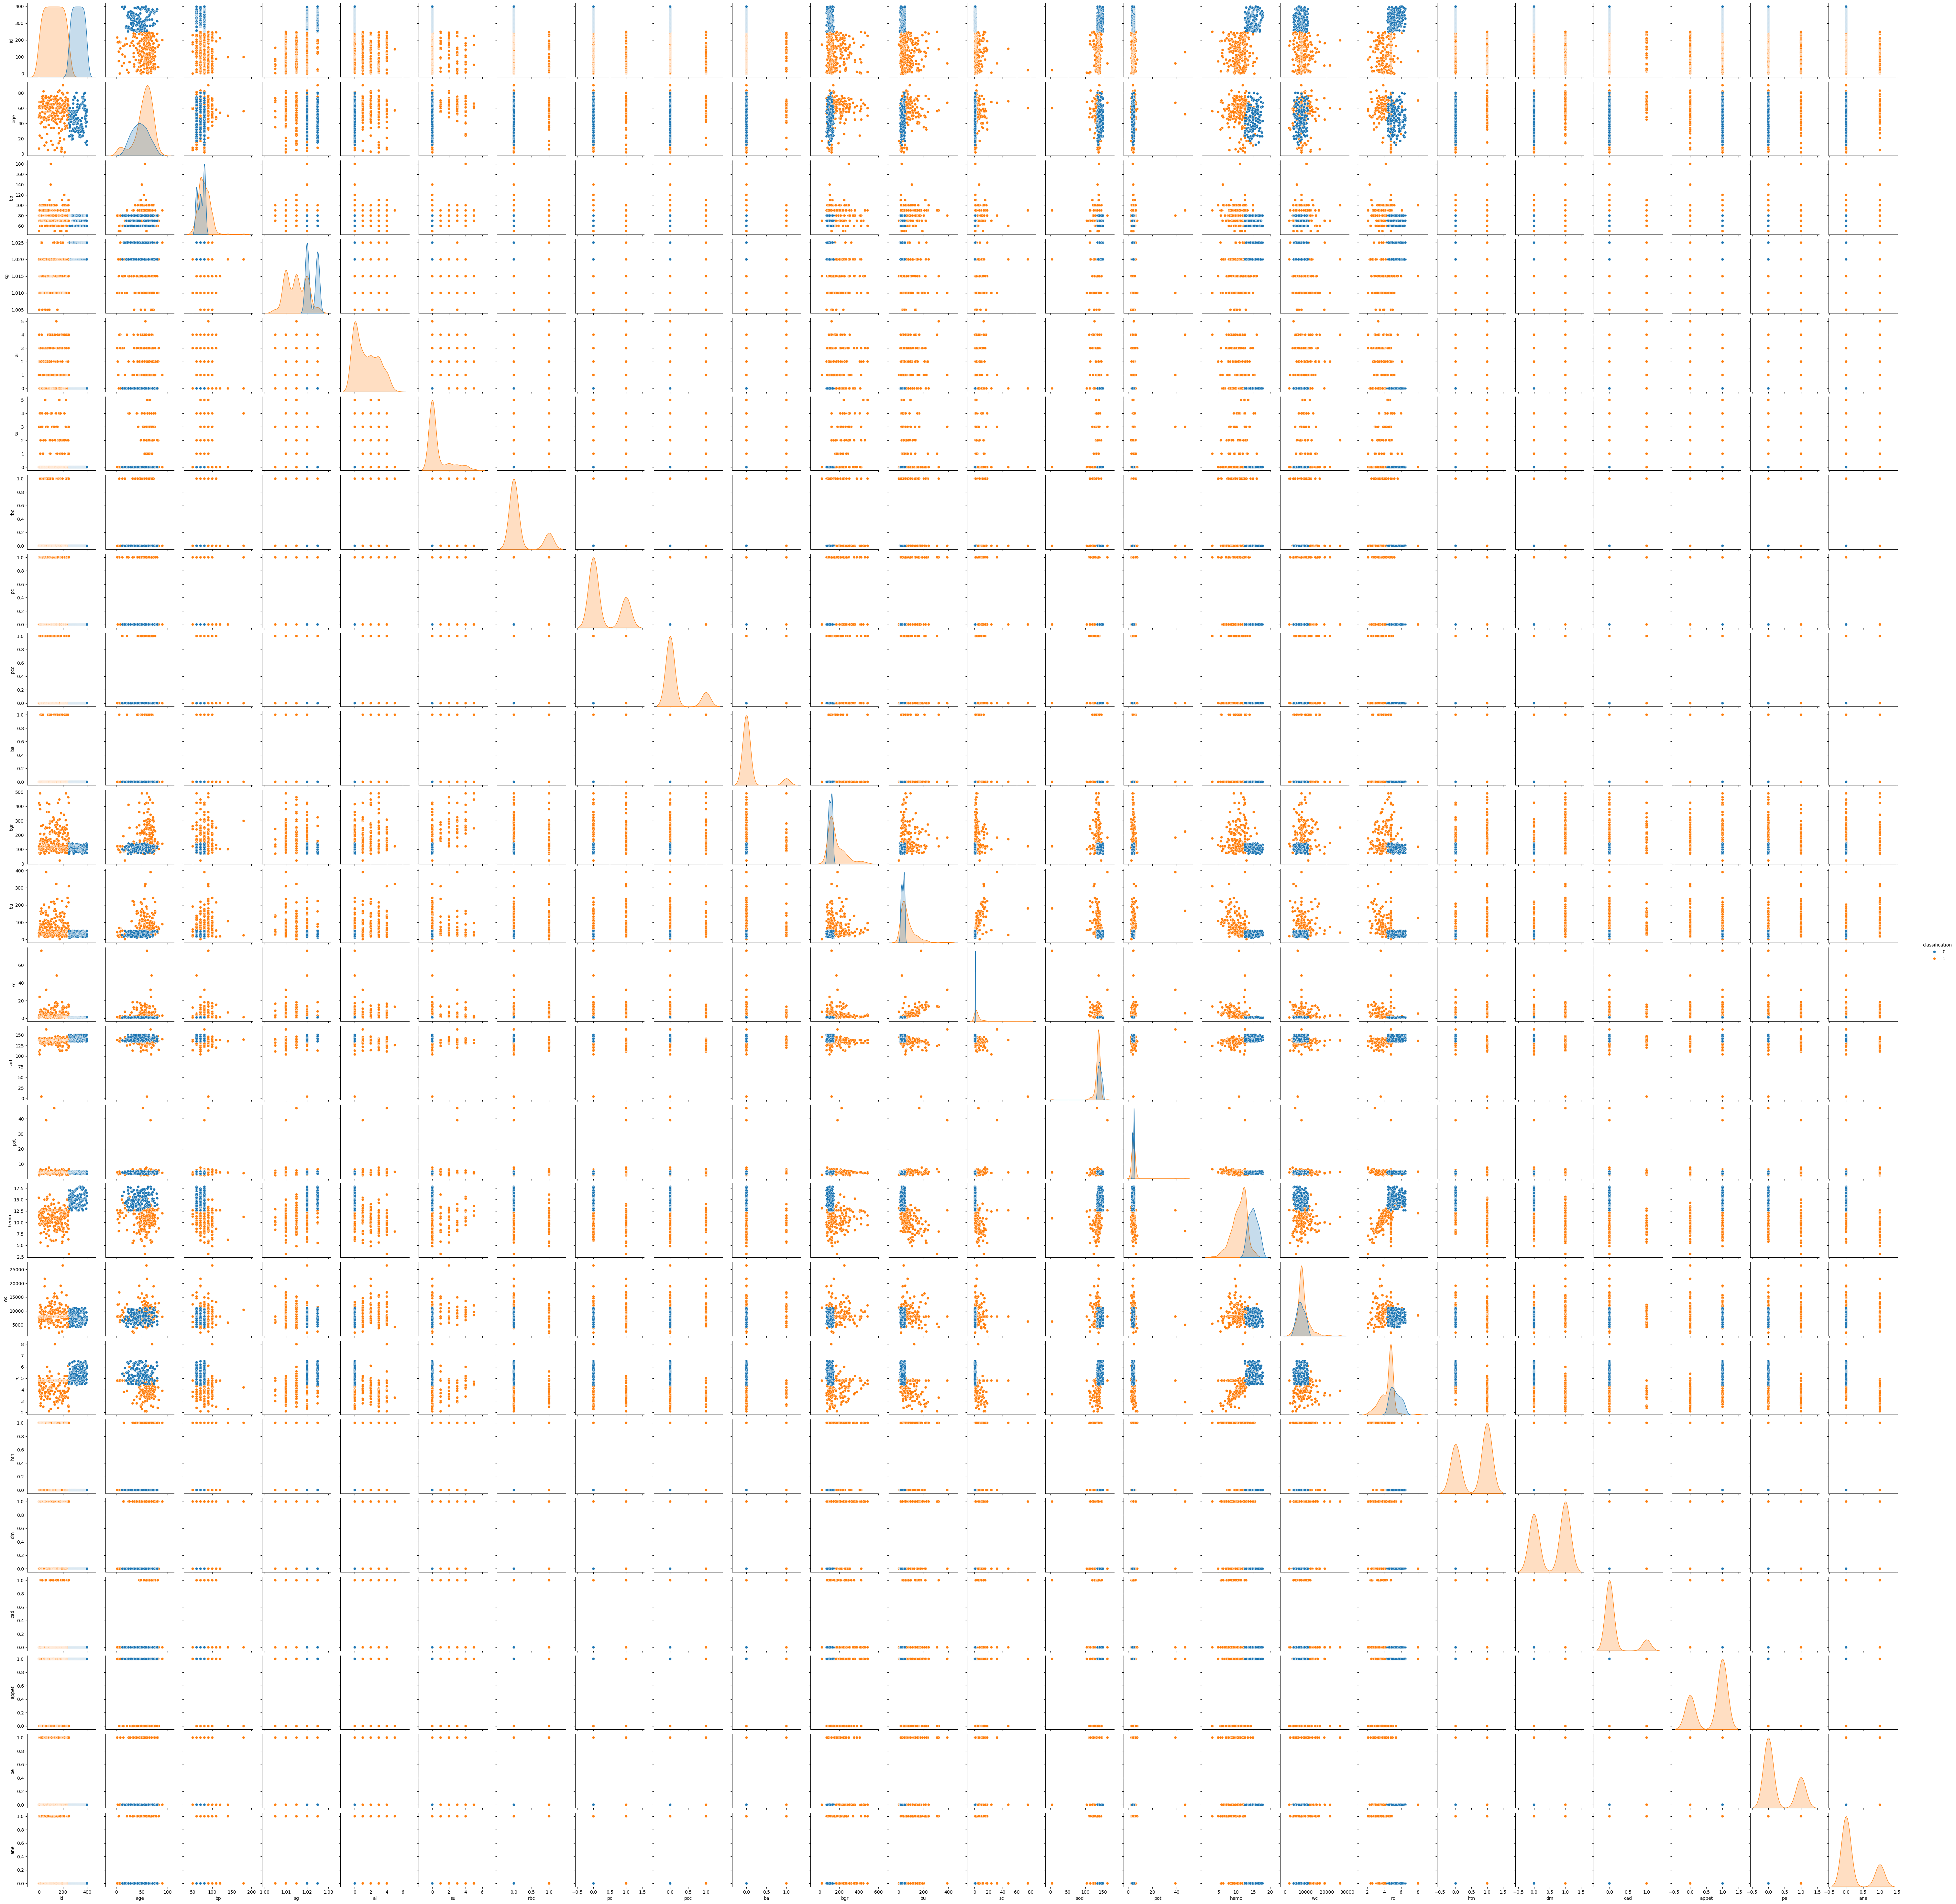

In [25]:
sns.pairplot(data = df,hue = 'classification') 
plt.show()

### Step 4: Divide Data Into Train and Test
##### Train Test Split

In [26]:
# 4.1 Divide data into Classification and Features
X = df.iloc[:,:-1] 
y = df['classification']

In [27]:
X.shape, y.shape

((400, 24), (400,))

In [28]:
# 4.2 Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


### Step 5: Multi Model Creation

#### 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()  
model_lr.fit(X_train,y_train)  

LogisticRegression()

In [31]:
y_pred = model_lr.predict(X_test)
# y_pred

In [32]:
# 5.1.2: Import model evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [33]:
# 5.1.3: Import Confusion Matrix to Evaluate classificationModel
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test,y_pred)

In [35]:
lr_score = model_lr.score(X_test,y_test)
lr_score

1.0

In [36]:
print(cm)

[[28  0]
 [ 0 52]]


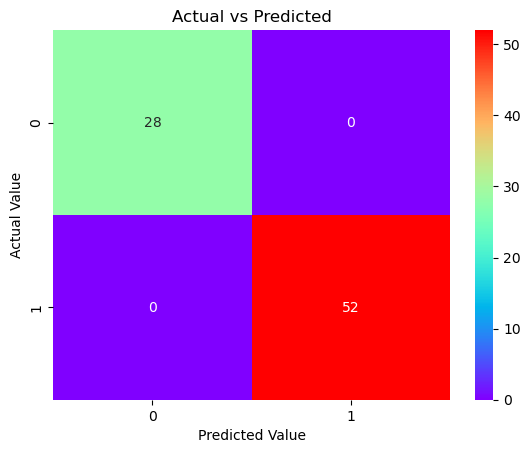

In [37]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='rainbow')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### 2. Naive Bayes ML Model

In [39]:
from sklearn.naive_bayes import GaussianNB
model_nv = GaussianNB()
model_nv.fit(X_train,y_train) 

GaussianNB()

In [40]:
y_pred = model_nv.predict(X_test)

In [41]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score:',nv_score)

Naive Bayes Score: 0.9875


In [42]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.9875
Precision Score:  1.0
Recall Score:  0.9807692307692307
F1 Score:  0.9902912621359223


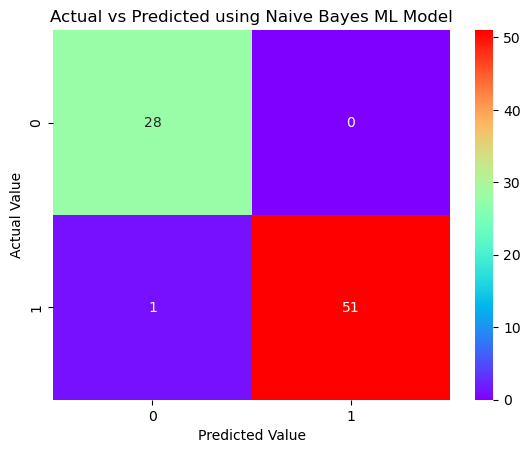

In [43]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='rainbow')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



#### 3.Support Vector Machine ML Model

In [45]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC()

In [46]:
y_pred = model_svc.predict(X_test)

In [47]:
svm_score = accuracy_score(y_test,y_pred)

In [48]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.65
Precision Score:  0.65
Recall Score:  1.0
F1 Score:  0.7878787878787878


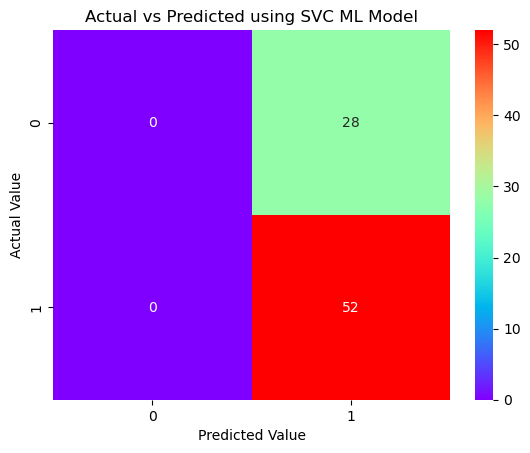

In [49]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='rainbow')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.65      1.00      0.79        52

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



#### 4. Decision Tree ML Model

In [51]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = model_dt.predict(X_test)

In [53]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


In [54]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

1.0

In [55]:
from sklearn.tree import plot_tree

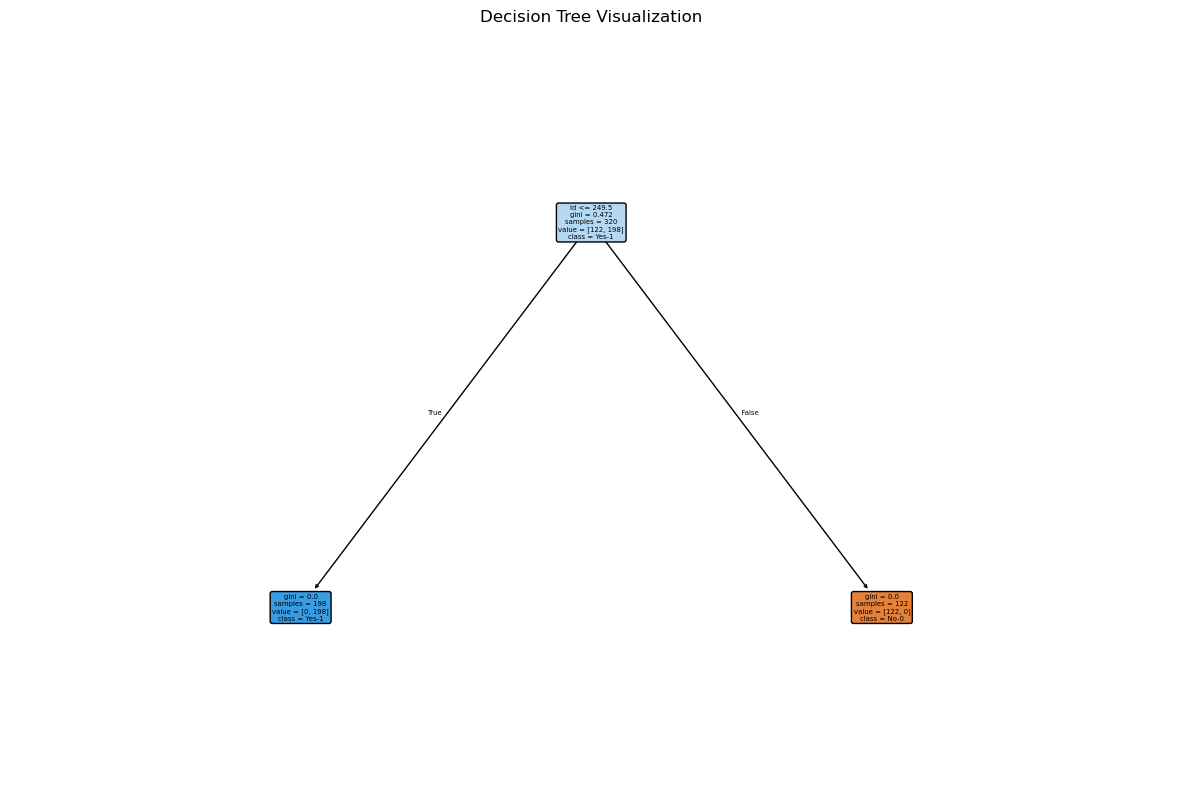

In [56]:
plt.figure(figsize=(15, 10)) 
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, 
          rounded=True, 
          fontsize=5) 
plt.title("Decision Tree Visualization")
plt.show() 

#### 5. Ensemble ML Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 200) 
model_rf.fit(X_train,y_train)  

RandomForestClassifier(n_estimators=200)

In [58]:
y_pred = model_rf.predict(X_test)

In [59]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


In [60]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

1.0

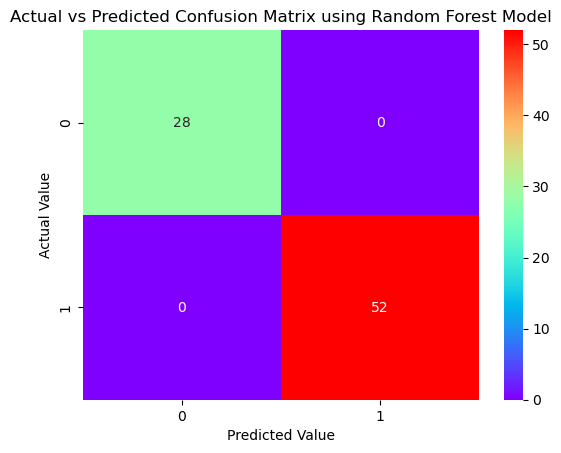

In [61]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Confusion Matrix using Random Forest Model')
sns.heatmap(cm,annot = True,cmap='rainbow')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### 6. KNN(K Nearest Neighbors)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
model_knn = KNeighborsClassifier(n_neighbors=14) # k= 14
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [65]:
y_pred = model_knn.predict(X_test)

In [66]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.8625

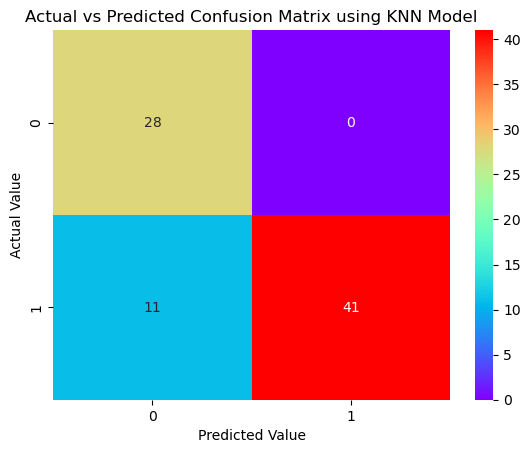

In [67]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Confusion Matrix using KNN Model')
sns.heatmap(cm,annot = True,cmap='rainbow')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        28
           1       1.00      0.79      0.88        52

    accuracy                           0.86        80
   macro avg       0.86      0.89      0.86        80
weighted avg       0.90      0.86      0.87        80



#### 7. XGBoost ML Model

In [69]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier() 
model_xgb.fit(X_train,y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [70]:
y_pred = model_xgb.predict(X_test)

In [71]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

1.0

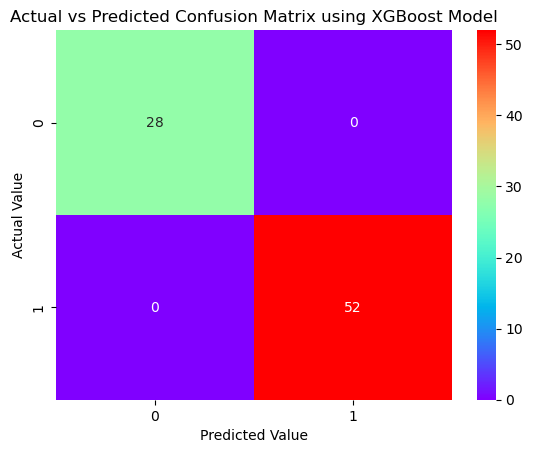

In [72]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Confusion Matrix using XGBoost Model')
sns.heatmap(cm,annot = True,cmap='rainbow')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Step 6: Artificial Neural network using Deep learning

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Check number of features in training data
n_features = X_train.shape[1]
print("Number of features:", n_features)

# Build model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_features,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))


Number of features: 24
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4406 - loss: 37.8398 - val_accuracy: 0.2875 - val_loss: 25.4233
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3531 - loss: 18.3950 - val_accuracy: 0.6250 - val_loss: 16.8286
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4812 - loss: 16.7048 - val_accuracy: 0.6125 - val_loss: 13.5991
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4938 - loss: 12.9396 - val_accuracy: 0.3625 - val_loss: 8.5004
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4875 - loss: 9.6060 - val_accuracy: 0.6375 - val_loss: 11.0434
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5188 - loss: 11.3614 - val_accuracy: 0.6250 - val_loss: 7.5990
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5250 - loss: 6.4431 - val_accuracy: 0.6250 - val_loss: 4.4153
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss:

In [75]:
y_pred = model.predict(X_test)
y_pred  = [round(i[0]) for i in  y_pred]
print(y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0]


In [76]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.95

### Step 7: All Model Comparison

In [77]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


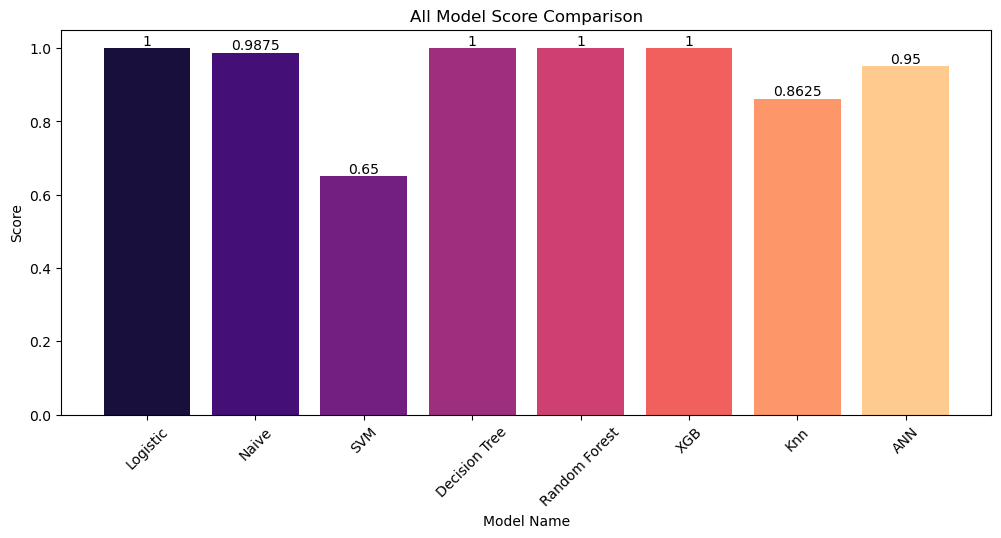

In [78]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('magma',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

- As you can see that 6 of the models have the same score in the graph , we will evaluate the models with more metrics than just accuracy score.
- If two models have same accuracy, we will rank them by F1 or ROC-AUC.
- We will use Cross-Validation (stability check) to get the best model
- The model with highest mean accuracy & lowest variance will be the best model.

In [79]:
# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = []
trained_models = {}  # to store trained model objects

for name, clf in models.items():
    clf.fit(X_train, y_train)
    trained_models[name] = clf  # keep the trained model
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

# Create results dataframe
results_df = pd.DataFrame(results).set_index("Model")
results_df


Accuracy  Precision    Recall        F1   ROC-AUC
Model                                                                 
Logistic Regression     1.000       1.00  1.000000  1.000000  1.000000
Random Forest           1.000       1.00  1.000000  1.000000  1.000000
SVM                     0.650       0.65  1.000000  0.787879  0.883929
KNN                     0.925       1.00  0.884615  0.938776  0.998626

In [80]:
# Pick best model based on Accuracy, F1, and ROC-AUC
best_model_name = results_df.sort_values(by=["Accuracy","F1","ROC-AUC"], ascending=False).index[0]
best_model = trained_models[best_model_name]

print("✅ Best model selected:", best_model_name)


✅ Best model selected: Logistic Regression


In [81]:
#3:Use Cross-Validation (stability check)
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

Logistic Regression: Mean Accuracy=0.9425, Std=0.0828
Random Forest: Mean Accuracy=0.9975, Std=0.0050
SVM: Mean Accuracy=0.6250, Std=0.0000
KNN: Mean Accuracy=0.8950, Std=0.0973


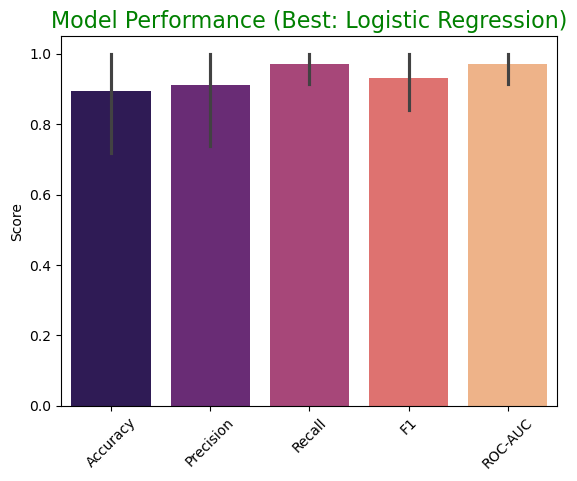

In [82]:
best_model_name = results_df.sort_values(by=["Accuracy","F1","ROC-AUC"], ascending=False).index[0]
sns.barplot(data=results_df, palette="magma")
plt.title(f"Model Performance (Best: {best_model_name})", fontsize=16, color="green")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

### After all the evaluation , we have come to the conclusion that the most accurate and feasible model to predict CKD is Logistic Regression.

### Step 8: Best Model Save

In [83]:
import joblib
joblib.dump(best_model, "ckd_best_model.pkl")
print(f"✅ Saved {best_model_name} as ckd_best_model.pkl")

✅ Saved Logistic Regression as ckd_best_model.pkl
